In [89]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt


class LawnmowerEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # Define the observation and action spaces
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)

        # Initialize the grid
        self.grid = np.array([[-6, -5, -6, -5],
                              [5, -6,  5, -6],
                              [-5,  6, -5,  6],
                              [6, -5,  6, -5]])

        # Initialize the agent and goal positions
        self.agent_pos = np.array([0, 0])
        self.goal_pos = np.array([3, 3])

        # Initialize the reward
        self.reward = 0
        # self.history = []

    def reset(self):
        # Reset the agent position and reward
        self.agent_pos = np.array([0, 0])
        self.reward = 0

        # Return the initial observation
        return self._get_observation()

    def step(self, action):
        # Move the agent based on the chosen action
        if action == 0:
            self.agent_pos[0] -= 1  # Up
        elif action == 1:
            self.agent_pos[0] += 1  # Down
        elif action == 2:
            self.agent_pos[1] += 1  # Right
        elif action == 3:
            self.agent_pos[1] -= 1  # Left

        # Keep the agent within the grid boundaries
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        # Calculate the reward based on the new agent position
        self.reward = self.grid[tuple(self.agent_pos)]
        # self.history.append({"observation": self._get_observation(), "reward": self.reward, "done": done})
        # Check if the episode is done
        # self.reward > 0
        done = bool(  np.array_equal(
            self.agent_pos, self.goal_pos))
        
        # self.history.append({"observation": self._get_observation(), "reward": self.reward, "done": done})
        # Return the new observation, reward, done flag, and info dictionary
        return self._get_observation(), self.reward, done, {}

    def render(self, mode='human'):
        # Create a new figure
        fig, ax = plt.subplots()
        """ 
        This code creates a scatter plot of the gridworld using the scatter method of matplotlib.axes.Axes object. 
        The plot is created for each position in the gridworld, with red markers for negative values, 
        blue markers for zero values, and green markers for positive values. 
        The agent's current position is marked with a yellow square, 
        while the goal position is marked with a magenta square.

        To use this method, you can simply call env.plot() where env is an instance of LawnmowerEnv.
        """
        # Plot the grid with markers for different tile types
        for i in range(4):
            for j in range(4):
                if self.grid[i][j] < 0:
                    ax.scatter(j, i, marker='X', color='r', s=1000)
                elif self.grid[i][j] == 0:
                    ax.scatter(j, i, marker='o', color='b', s=1000)
                elif self.grid[i][j] > 0:
                    ax.scatter(j, i, marker='o', color='g', s=1000)

        # Plot the agent and goal positions
        ax.scatter(self.agent_pos[1], 3 - self.agent_pos[0],
                   marker='s', color='y', s=1000)
        ax.scatter(self.goal_pos[1], 3 - self.goal_pos[0],
                   marker='s', color='m', s=1000)

        # Set the x and y axis limits
        ax.set_xlim([-0.5, 3.5])
        ax.set_ylim([-0.5, 3.5])

        # Show the plot
        plt.show()

    def _get_observation(self):
        # Convert the agent position to an observation index
        return np.ravel_multi_index(tuple(self.agent_pos), (4, 4))


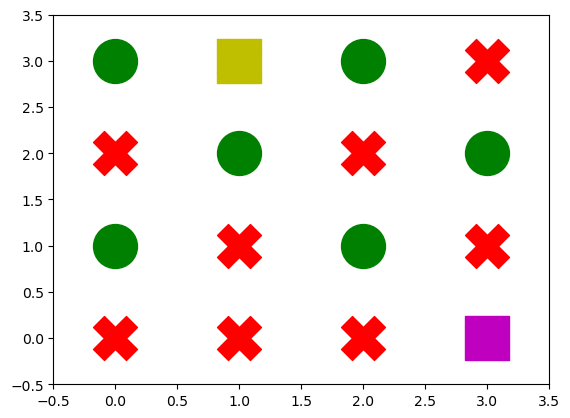

Action: 2
Reward: -5
Done: False


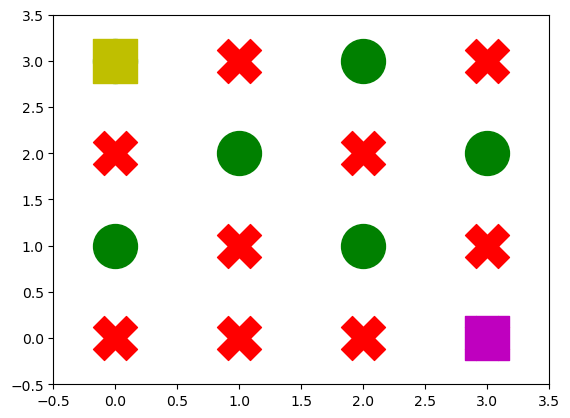

Action: 3
Reward: -6
Done: False


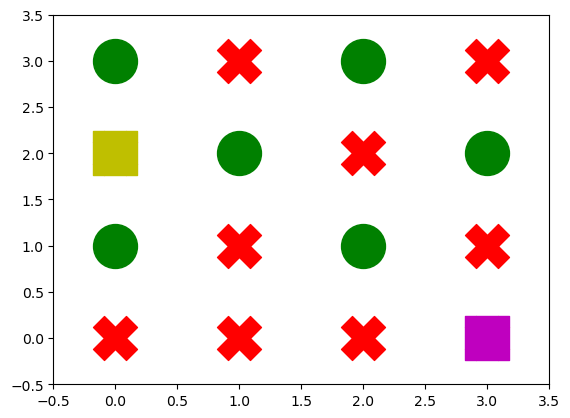

Action: 1
Reward: 5
Done: False


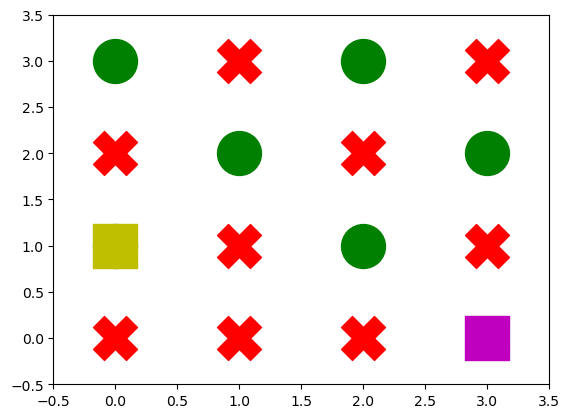

Action: 1
Reward: -5
Done: False


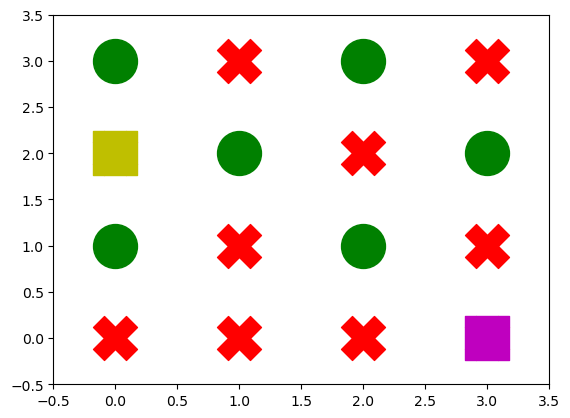

Action: 0
Reward: 5
Done: False


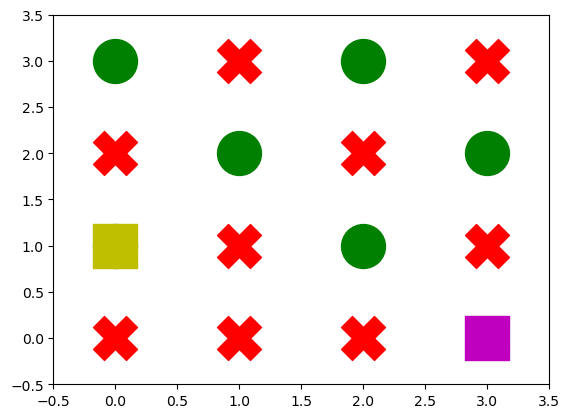

Action: 1
Reward: -5
Done: False


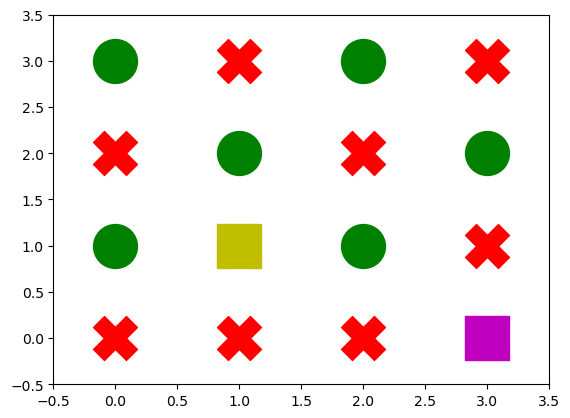

Action: 2
Reward: 6
Done: False


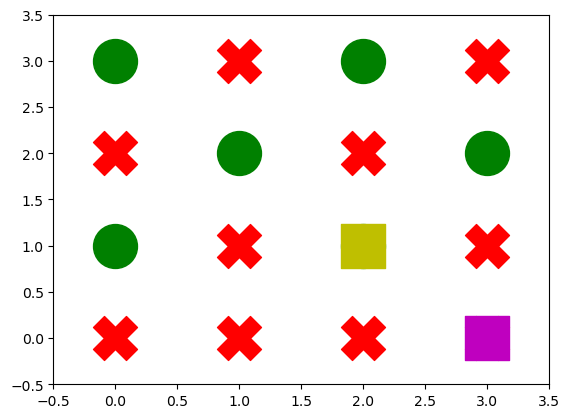

Action: 2
Reward: -5
Done: False


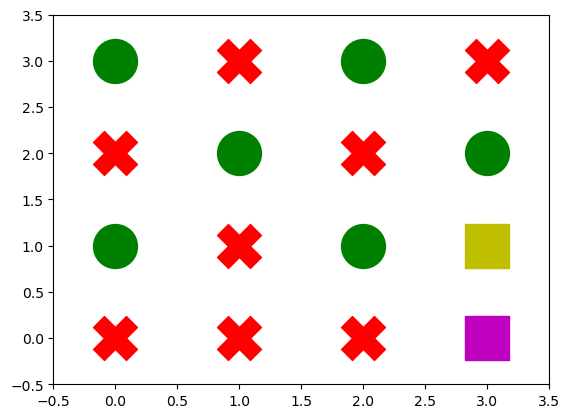

Action: 2
Reward: 6
Done: False


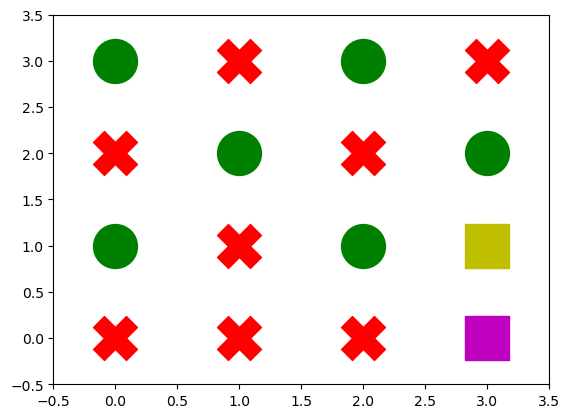

Action: 2
Reward: 6
Done: False


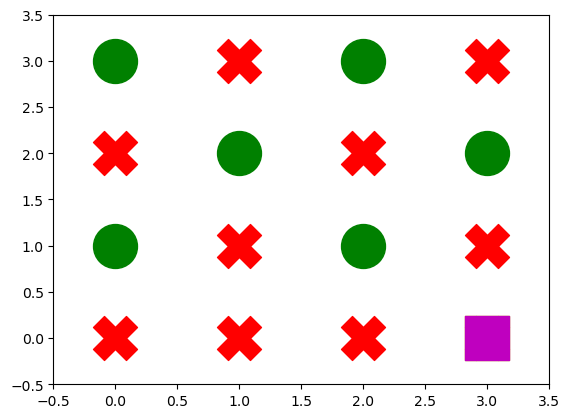

Action: 1
Reward: -5
Done: True
Our object reached it's destition at 11th step!


In [90]:
env = LawnmowerEnv()
obs = env.reset()

for t in range(100):
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)
    env.render()
    print('Action:', action)
    print('Reward:', reward)
    print('Done:', done)
    if done:
        print(f"Our object reached it's destition at {t+1}th step!")
        break

The environment defined here is a gridworld called "LawnmowerEnv". The gridworld consists of a 4x4 grid, where each cell has a certain reward value. The agent's objective is to reach the goal position, which is located at the bottom-right corner of the grid. The agent can move in four directions - up, down, left, and right - and receives a reward based on the value of the cell it moves into. The episode ends when the agent reaches the goal position or moves into a cell with a positive reward.

The visualization of the environment is provided by the render method of the LawnmowerEnv class. It creates a scatter plot of the gridworld using the scatter method of matplotlib.axes.Axes object. The plot is created for each position in the gridworld, with red markers for negative values, blue markers for zero values, and green markers for positive values. The agent's current position is marked with a yellow square, while the goal position is marked with a magenta square.

To ensure the safety of the environment, the step method of the LawnmowerEnv class restricts the agent's movement to within the boundaries of the gridworld. This is done using the np.clip method, which clips the agent's position to the limits of the grid. Additionally, the action_space and observation_space attributes of the LawnmowerEnv class ensure that the agent only chooses actions that are allowed, and the agent navigates within the defined state-space. The action_space attribute restricts the agent to four discrete actions - up, down, left, and right - while the observation_space attribute restricts the agent's observation space to a discrete set of 16 states.